The human body constantly emmits life signs that can be detected with inertial sensors, such as accelerometers, gyroscopes, and magnetometers. In practice, these sensors are integrated through a device called an Inertial Measurement Unit (IMU) that allows, for example, tracing the heart activity thanks to small body movements caused by the contraction and relaxation of the heart. 

This way to monitor the heart is known as ballistocardiography (BCG) or seismocardiography (SCG). In simple terms, BCG and SCG are both are non-invasive techniques used to monitor the human heart, based on its mechanical activity. These techniques record the micromovements induced by cardiovascular activity at the body’s center of mass and on the chest.

<center>
  <img src="example.png" width="40%">
</center>

**Sources:**

* Haescher, M., Matthies, D. J., Trimpop, J., & Urban, B. (2015, June). A study on measuring heart-and respiration-rate via wrist-worn accelerometer-based seismocardiography (SCG) in comparison to commonly applied technologies. In Proceedings of the 2nd international Workshop on Sensor-based Activity Recognition and Interaction (pp. 1-6).

* Balali, P., Rabineau, J., Hossein, A., Tordeur, C., Debeir, O., & Van De Borne, P. (2022). Investigating cardiorespiratory interaction using ballistocardiography and seismocardiography—a narrative review. Sensors, 22(23), 9565.

In the following project, we estimate the heart rate of a healthy subject (or two?), by blablabla

The measurements were done by using a MuSe (Multi-Sensor miniaturized, low-power, wireless IMU), which recorded all the inertial data necessary for the estimation of SCG and BCG.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cs=pd.read_csv('4center_sternum.txt: MuSe placed on the center of the sternum. The subject was lying supine on his left and right side, respectively.
_Chest_sweater.txt', sep='\t')
cs

,Log Mode,Log Freq,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ,qw,qi,qj,qk
0,5,100,1555414552,687.836,380.823,580.354,-7.926829,8.048780,0.975610,-592,122,-113,0.788006,0.002899,-0.432874,-0.437788
1,5,100,1555414552,-812.703,-108.946,726.876,-11.707320,-81.829270,8.780488,125,60,-128,0.183978,-0.428877,0.002594,0.884426
2,5,100,1555414552,-812.520,-108.824,733.952,-37.073170,-145.487800,14.756100,123,59,-136,0.128994,-0.427229,0.000702,0.894894
3,5,100,1555414552,-787.144,-45.628,616.954,-56.341460,-174.634200,23.048780,118,58,-145,0.113618,-0.421033,-0.001770,0.899899
4,5,100,1555414552,-800.259,-137.433,411.689,-1.097561,37.073170,1.341463,113,57,-157,0.107202,-0.424787,-0.001251,0.898923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14933,5,100,1555415471,-890.722,-81.008,446.764,-2.682927,2.926829,0.365854,144,47,-50,0.017279,0.534410,0.040437,-0.844081
14934,5,100,1555415471,-885.964,-76.006,459.025,-3.902439,3.292683,0.365854,146,45,-51,0.016416,0.535050,0.041231,-0.843654
14935,5,100,1555415471,-879.681,-77.714,475.068,-3.048780,2.804878,0.365854,144,46,-54,0.015920,0.534349,0.041780,-0.844081
14936,5,100,1555415471,-894.992,-76.311,502.701,0.121951,1.463415,0.609756,144,45,-53,0.015192,0.531663,0.041749,-0.845790


Because the most common wearable systems for detecting muscle activity are based on accelerometry (Haescher, 2015)...
( Lets do a correlation matrix to justify which variables are we going to use - MEL)

In [3]:
cs = cs[["Timestamp", "AccX", "AccY", "AccZ"]].copy()
cs

,Timestamp,AccX,AccY,AccZ
0,1555414552,687.836,380.823,580.354
1,1555414552,-812.703,-108.946,726.876
2,1555414552,-812.520,-108.824,733.952
3,1555414552,-787.144,-45.628,616.954
4,1555414552,-800.259,-137.433,411.689
...,...,...,...,...
14933,1555415471,-890.722,-81.008,446.764
14934,1555415471,-885.964,-76.006,459.025
14935,1555415471,-879.681,-77.714,475.068
14936,1555415471,-894.992,-76.311,502.701


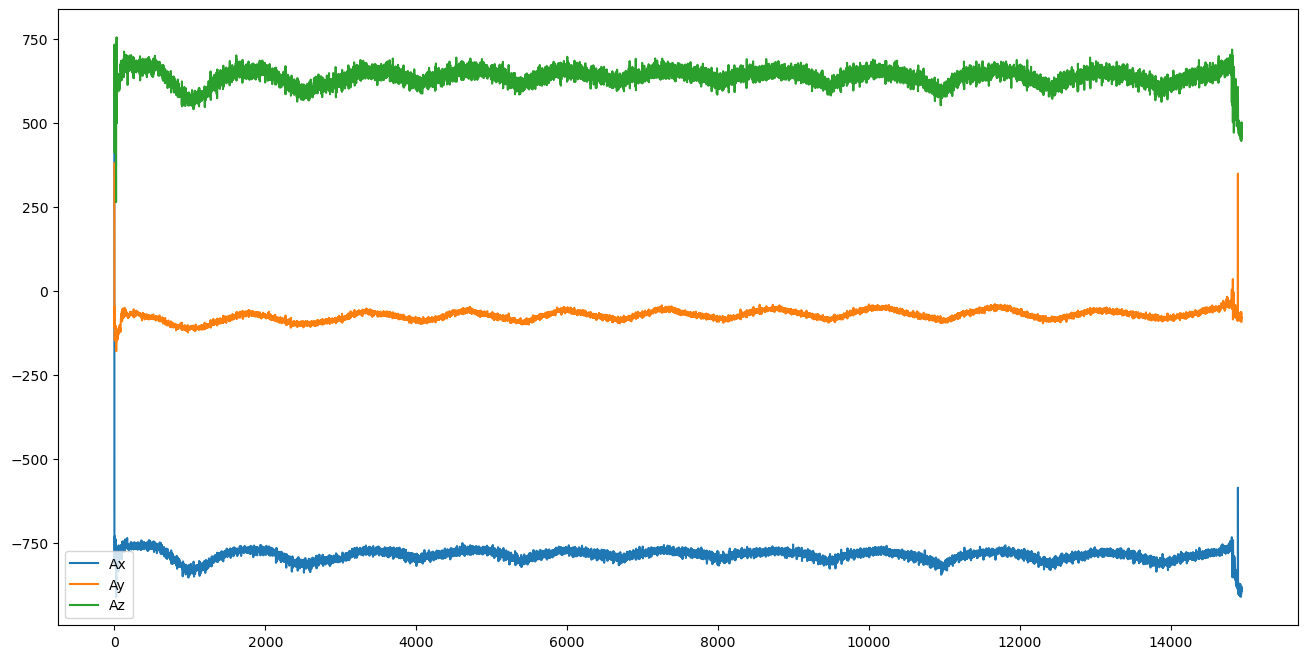

In [4]:
plt.figure(figsize=(16, 8))
plt.plot(cs['AccX'],label='Ax')
plt.plot(cs['AccY'],label='Ay')
plt.plot(cs['AccZ'],label='Az')
plt.legend()

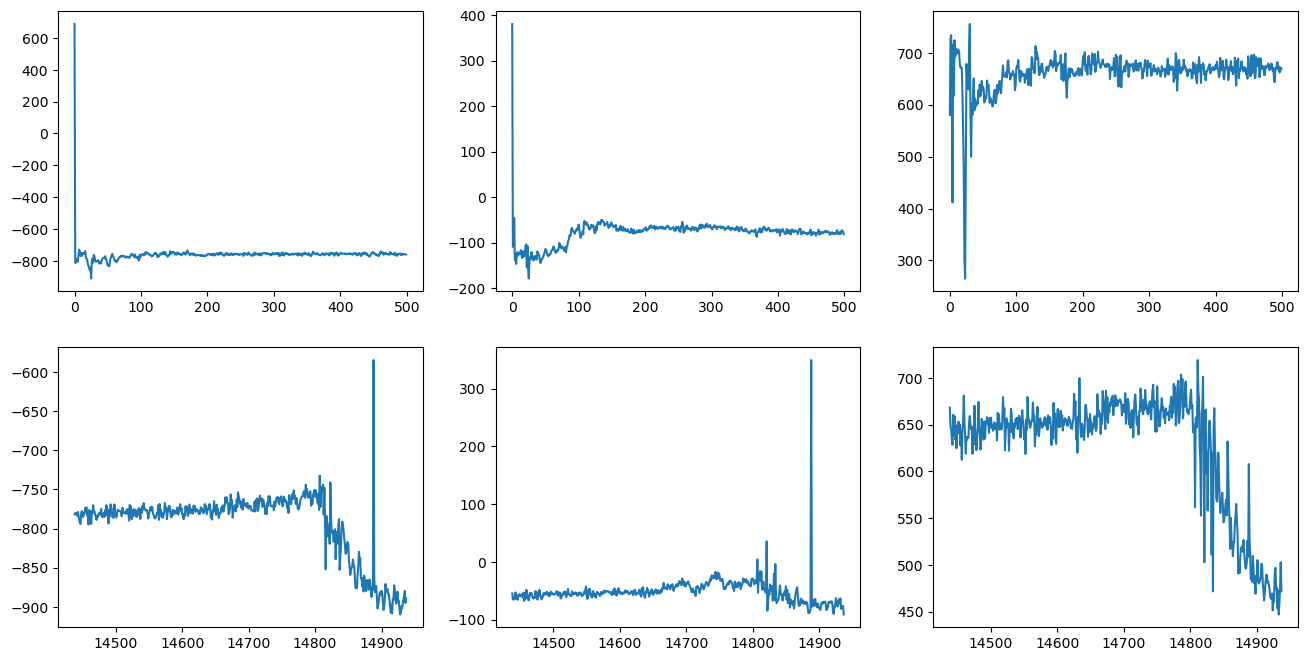

In [5]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(16, 8))

ax1.plot(cs["AccX"][:500])
ax2.plot(cs["AccY"][:500])
ax3.plot(cs["AccZ"][:500])

ax4.plot(cs["AccX"][-500:])
ax5.plot(cs["AccY"][-500:])
ax6.plot(cs["AccZ"][-500:])

plt.show()

After zooming into these specific regions, we decided to exclude the first and last 200 data points...

In [6]:
cs_clean = cs[200:-200].copy()
cs_clean

,Timestamp,AccX,AccY,AccZ
200,1555415326,-761.768,-69.113,684.969
201,1555415326,-755.302,-66.246,693.997
202,1555415326,-757.315,-73.993,677.649
203,1555415326,-758.535,-70.516,701.439
204,1555415326,-762.439,-71.614,668.926
...,...,...,...,...
14733,1555415469,-771.284,-41.358,674.599
14734,1555415469,-771.223,-38.247,671.000
14735,1555415469,-771.711,-33.428,663.985
14736,1555415469,-771.406,-29.402,660.813


Following Haescher(2015), a combined signal from the three axes was generated by computing the magnitude of the acceleration vector: $$a= \sqrt{a_x^2 + a_y^2 +az^2}$$

In [7]:
cs_clean['Acc'] = np.sqrt(cs_clean['AccX']**2 + cs_clean['AccY']**2 + cs_clean['AccZ']**2)
#cs_clean

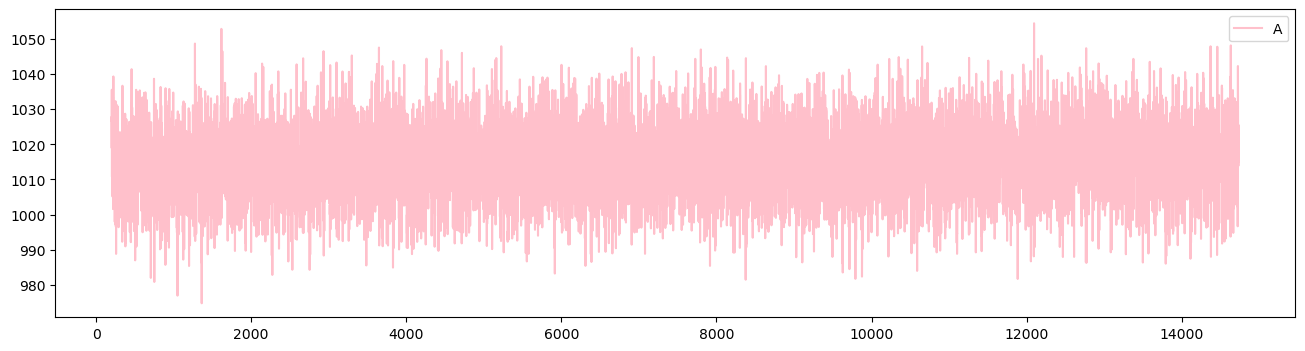

In [8]:
plt.figure(figsize=(16, 4))
plt.plot(cs_clean['Acc'],color='pink', label='A')
plt.legend()

In [9]:
import numpy as np

M = np.array([
    [1.002982,    0.000094155, 0.004346743],
    [0.000090446, 1.002731,   -0.001444198],
    [0.004346536, -0.001444751, 1.030587]
])

offset = np.array([3.602701, -20.96658, 54.97186])

raw_data = cs_clean[['AccX', 'AccY', 'AccZ']].values

# Calibración: (Dato - Offset) multiplicado por M ( - or + ???)

calibrated_data = (raw_data - offset) @ M.T

cs_clean[['AccX_cal', 'AccY_cal', 'AccZ_cal']] = calibrated_data

In [10]:
cs_clean['Acc_cal'] = np.sqrt(cs_clean['AccX_cal']**2 + cs_clean['AccY_cal']**2 + cs_clean['AccZ_cal']**2)
cs_clean

,Timestamp,AccX,AccY,AccZ,Acc,AccX_cal,AccY_cal,AccZ_cal,Acc_cal
200,1555415326,-761.768,-69.113,684.969,1026.766587,-764.919134,-49.256973,646.009711,1002.425098
201,1555415326,-755.302,-66.246,693.997,1027.862578,-758.394340,-46.394597,655.337813,1003.385311
202,1555415326,-757.315,-73.993,677.649,1018.925483,-760.485133,-54.139326,638.492219,994.455136
203,1555415326,-758.535,-70.516,701.439,1035.550348,-761.605034,-50.687298,662.999558,1011.029102
204,1555415326,-762.439,-71.614,668.926,1016.810596,-765.662105,-51.741695,629.476700,992.550542
...,...,...,...,...,...,...,...,...,...
14733,1555415469,-771.284,-41.358,674.599,1025.511240,-774.505973,-21.412059,635.241063,1001.922745
14734,1555415469,-771.223,-38.247,671.000,1022.980327,-774.460142,-18.287359,631.527751,999.474982
14735,1555415469,-771.711,-33.428,663.985,1018.592843,-774.979636,-13.445112,624.289100,995.244235
14736,1555415469,-771.406,-29.402,660.813,1016.171991,-774.687135,-9.403508,621.015587,992.919404


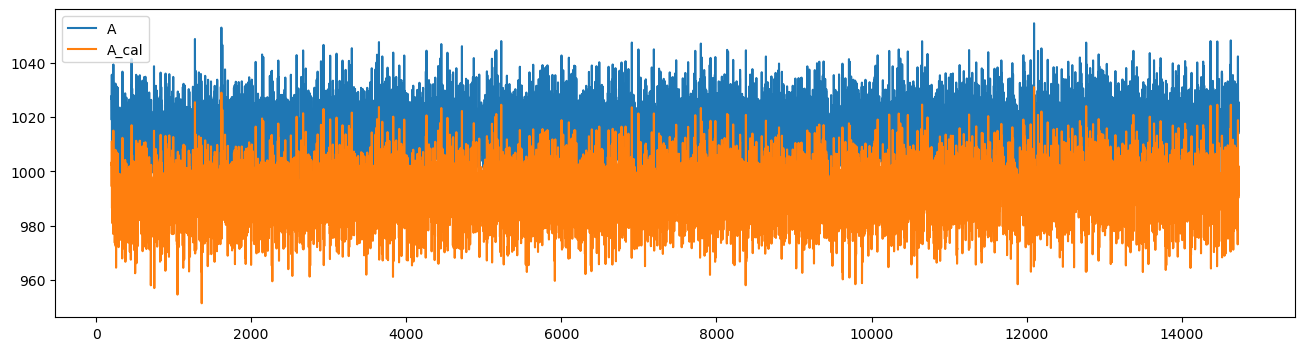

In [11]:
plt.figure(figsize=(16, 4))
plt.plot(cs_clean['Acc'], label='A')
plt.plot(cs_clean['Acc_cal'], label='A_cal')
plt.legend()

Apart from calibration we face another problem. The instructions says: plot selected data in function of TIME and choose a properly time window over which to perform the analysis. Pay attention on TIME REPPRESENTATION and the MEASUREMENT UNIT.

In [20]:
import datetime # The datetime module supplies classes for manipulating dates and times

ts = 1555415326 # 2019-04-16 13:48:46
#ts = 1555415469	# 2019-04-16 13:51:09
fecha_humana = datetime.datetime.fromtimestamp(ts)
# fromtimestamp() Function Of Datetime.date Class In Python. 
# fromtimestamp() function in Python is used to return the date corresponding to a specified timestamp.

# I read and there are different types of timestamps.
# Apparently the one we have is in a format called unix time stamp.
# Basically is a way to track time as a running total of seconds. The count starts on January 1st, 1970 at UTC

# To be sure we print the date and it is indeed the same it is in the README file.
print(fecha_humana)

2019-04-16 13:48:46


However is not that easy to convert to seconds because the device has a certain frequency (100 Hz), meaning that it makes around 100 samples each seconds, so we have many records for the same timestamp.

In [13]:
conteos = cs['Timestamp'].value_counts()
print(conteos)

Timestamp
1555415336    112
1555415339    112
1555415332    112
1555415329    112
1555415343    112
             ... 
1555415464     98
1555415470     98
1555415469     98
1555415471     70
1555414552     14
Name: count, Length: 148, dtype: int64


In [14]:
freq = cs['Timestamp'].value_counts().mean()
freq

np.float64(100.93243243243244)

In [21]:
cs_clean['Time'] = np.arange(len(cs_clean))/freq # numero de la muestra / frequencia 
cs_clean
# PREGUNTARLE A ANDRES.
# makes sense bc there are around 143 seconds between 2019-04-16 13:48:46 and 2019-04-16 13:51:09
# probably its better to do this before cutting the data.

,Timestamp,AccX,AccY,AccZ,Acc,AccX_cal,AccY_cal,AccZ_cal,Acc_cal,Time
200,1555415326,-761.768,-69.113,684.969,1026.766587,-764.919134,-49.256973,646.009711,1002.425098,0.000000
201,1555415326,-755.302,-66.246,693.997,1027.862578,-758.394340,-46.394597,655.337813,1003.385311,0.009908
202,1555415326,-757.315,-73.993,677.649,1018.925483,-760.485133,-54.139326,638.492219,994.455136,0.019815
203,1555415326,-758.535,-70.516,701.439,1035.550348,-761.605034,-50.687298,662.999558,1011.029102,0.029723
204,1555415326,-762.439,-71.614,668.926,1016.810596,-765.662105,-51.741695,629.476700,992.550542,0.039630
...,...,...,...,...,...,...,...,...,...,...
14733,1555415469,-771.284,-41.358,674.599,1025.511240,-774.505973,-21.412059,635.241063,1001.922745,143.987415
14734,1555415469,-771.223,-38.247,671.000,1022.980327,-774.460142,-18.287359,631.527751,999.474982,143.997322
14735,1555415469,-771.711,-33.428,663.985,1018.592843,-774.979636,-13.445112,624.289100,995.244235,144.007230
14736,1555415469,-771.406,-29.402,660.813,1016.171991,-774.687135,-9.403508,621.015587,992.919404,144.017138


In [ ]:
# DEFINIR UN ORDEN PARA HACER LA CONVERSION A SEGUNDOS, LA CALIBRACION, LA TRUNCACIÓN? DE DATOS...